<a href="https://colab.research.google.com/github/sashank1326/ML_Practice/blob/main/Assign1_PART_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# **a)Data Loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Breast_cancer_data.csv")

df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


# **Data preprocessing**

In [ ]:
# Count total rows
total_rows = len(df)
# Count missing values per column and percentage
missing = df.isnull().sum()
missing_percent = (missing / total_rows) * 100
print(pd.DataFrame({"Missing Values": missing, "Percent": missing_percent}))

                         Missing Values  Percent
id                                    0      0.0
diagnosis                             0      0.0
radius_mean                           0      0.0
texture_mean                          0      0.0
perimeter_mean                        0      0.0
area_mean                             0      0.0
smoothness_mean                       0      0.0
compactness_mean                      0      0.0
concavity_mean                        0      0.0
concave points_mean                   0      0.0
symmetry_mean                         0      0.0
fractal_dimension_mean                0      0.0
radius_se                             0      0.0
texture_se                            0      0.0
perimeter_se                          0      0.0
area_se                               0      0.0
smoothness_se                         0      0.0
compactness_se                        0      0.0
concavity_se                          0      0.0
concave points_se   

# **b)Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split

# Convert target to numeric: M=1, B=0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Features and target
X = df[['radius_mean']]  # use 1 feature for visualization
y = df["diagnosis"]

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (455, 1)
Test size: (114, 1)


# **c)Logistic Regression and L2 Regularization**

In [ ]:

# Logistic Regression with L2 regularization (C=1/lambda)
lambda_value = 1  # regularization strength
model = LogisticRegression(penalty='l2', C=1/lambda_value, solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Predict probabilities for curve
X_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_probs = model.predict_proba(X_vals)[:, 1]

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
train_loss = log_loss(y_train, model.predict_proba(X_train)[:,1])
test_loss = log_loss(y_test, model.predict_proba(X_test)[:,1])
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print("Train log-loss:", train_loss)
print("Test log-loss:", test_loss)
print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)
print("Weights:", model.coef_)
print("Bias:", model.intercept_)

Train log-loss: 0.29002702609482456
Test log-loss: 0.2903116869738977
Train accuracy: 0.8879120879120879
Test accuracy: 0.8421052631578947
Weights: [[1.00853221]]
Bias: [-14.91581827]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
results_df = X_test.copy()  # keep your input features
results_df['Actual_Diagnosis'] = y_test.values
results_df['Predicted_Diagnosis'] = y_pred

# Print the first 20 rows
print(results_df.head(20))

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print("ACCURACY:", accuracy, "%")

     radius_mean  Actual_Diagnosis  Predicted_Diagnosis
120       11.410                 0                    0
250       20.940                 1                    1
375       16.170                 0                    1
99        14.420                 1                    0
455       13.380                 0                    0
318        9.042                 0                    0
39        13.480                 1                    0
371       15.190                 0                    1
98        11.600                 0                    0
502       12.540                 0                    0
479       16.250                 1                    1
60        10.170                 0                    0
280       19.160                 1                    1
420       11.570                 0                    0
221       13.560                 0                    0
116        8.950                 0                    0
73        13.800                 1              

Plotting

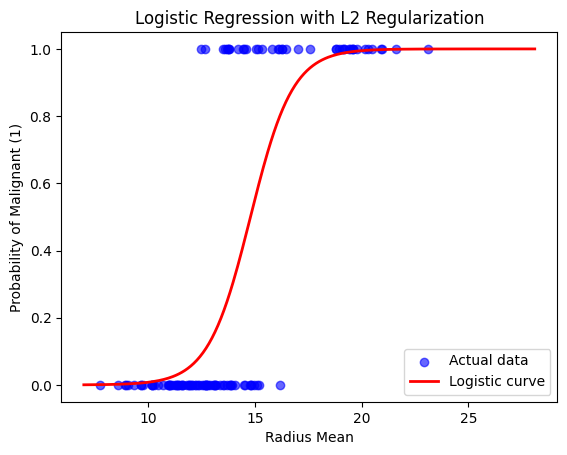

In [ ]:
# Visualize logistic regression fit
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual data')
plt.plot(X_vals, y_probs, color='red', linewidth=2, label='Logistic curve')
plt.xlabel('Radius Mean')
plt.ylabel('Probability of Malignant (1)')
plt.title('Logistic Regression with L2 Regularization')
plt.legend()
plt.show()


# **d)**
Run logistic regression on the data using L2 regularization, varying the regularization parameter
λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data
and the testing data (averaged over all instances), as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third
graph the actual values of the weights obtained (one curve per weight). Finally, plot on a
graph the accuracy on the training and test set. Explain briefly what you see.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Breast_cancer_data.csv")

In [ ]:
# Use all features now


# Drop target and empty column
X = df.drop(columns=["diagnosis", "Unnamed: 32"], errors='ignore')

y = df["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Impute missing values (fill NaN with column mean)
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Regularization parameters
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Lists to store results
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
weight_norms = []
all_weights = []

In [ ]:
for lam in lambdas:
    # Handle λ=0 case (no regularization) by using very large C
    C_value = 1e12 if lam == 0 else 1/lam

    # Create model
    model = LogisticRegression(penalty='l2', C=C_value, solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predict probabilities
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]

    # Predict classes
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute metrics
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

    # Store L2 norm and weights
    weight_norms.append(np.linalg.norm(model.coef_))
    all_weights.append(model.coef_.flatten())


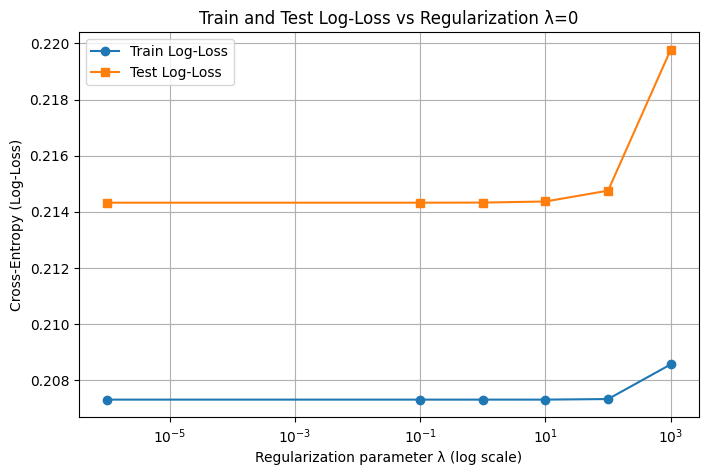

In [ ]:
# Avoid log(0) for λ=0
lambda_vals_plot = np.array(lambdas) + 1e-6

plt.figure(figsize=(8,5))
plt.plot(lambda_vals_plot, train_losses, marker='o', label='Train Log-Loss')
plt.plot(lambda_vals_plot, test_losses, marker='s', label='Test Log-Loss')
plt.xscale('log')
plt.xlabel('Regularization parameter λ (log scale)')
plt.ylabel('Cross-Entropy (Log-Loss)')
plt.title('Train and Test Log-Loss vs Regularization λ=0')
plt.legend()
plt.grid(True)
plt.show()


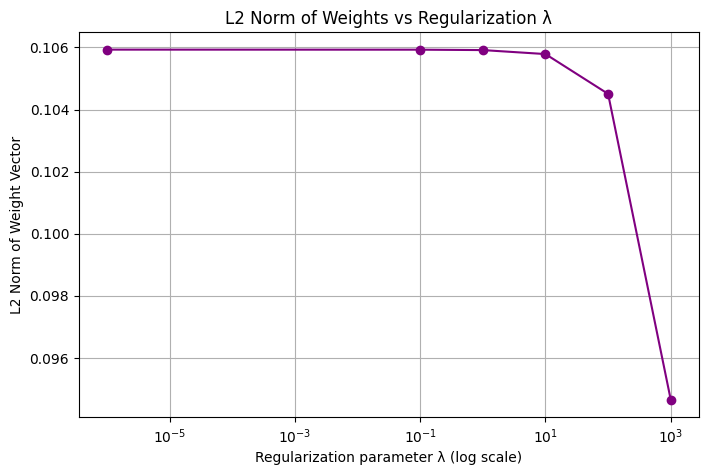

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(lambda_vals_plot, weight_norms, marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Regularization parameter λ (log scale)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('L2 Norm of Weights vs Regularization λ')
plt.grid(True)
plt.show()


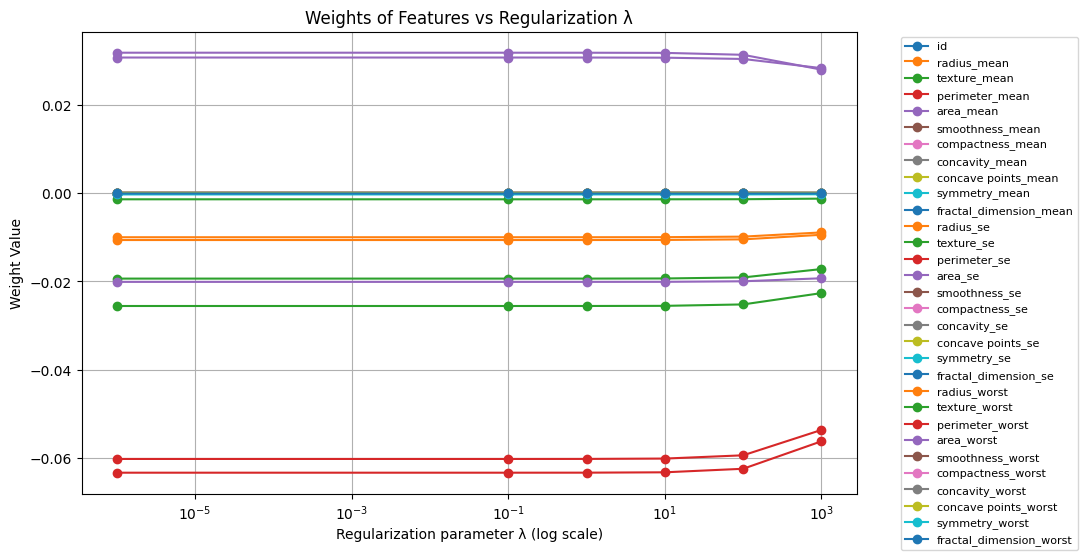

In [ ]:
plt.figure(figsize=(10,6))

# Convert list of weights to numpy array for easier plotting
all_weights_arr = np.array(all_weights)  # shape: (num_lambdas, num_features)

# Plot one curve per feature
for i in range(all_weights_arr.shape[1]):
    plt.plot(lambda_vals_plot, all_weights_arr[:, i], marker='o', label=X.columns[i])

plt.xscale('log')
plt.xlabel('Regularization parameter λ (log scale)')
plt.ylabel('Weight Value')
plt.title('Weights of Features vs Regularization λ')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)  # place legend outside
plt.grid(True)
plt.show()


# **e)**
Re-format the data in the following way: take each of the input variables, and feed it through
a set of Gaussian basis functions, defined as follows. For each variable (except the bias term),
use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ.
You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML_LAB/Breast_cancer_data.csv")

In [ ]:
def gaussian_basis_transform(X, num_basis=5, mu_min=-10, mu_max=10, sigma=1.0):
    """
    Transforms the input DataFrame X using Gaussian basis functions.

    Parameters:
    X : pd.DataFrame or np.array
        Input features (num_samples x num_features)
    num_basis : int
        Number of basis functions per feature
    mu_min, mu_max : float
        Range of means for Gaussian centers
    sigma : float
        Standard deviation for Gaussian functions

    Returns:
    X_transformed : np.array
        Transformed feature matrix
    """
    X = np.array(X)
    num_samples, num_features = X.shape
    X_transformed = []

    # Generate evenly spaced μ values for each feature
    mus = np.linspace(mu_min, mu_max, num_basis)

    for i in range(num_features):
        # Apply each Gaussian to feature i
        for mu in mus:
            phi = np.exp(-(X[:, i] - mu)**2 / (2 * sigma**2))
            X_transformed.append(phi)

    # Transpose to shape (num_samples, num_features*num_basis)
    return np.array(X_transformed).T


In [ ]:
# Example: use σ = 0.1
sigma_val = 0.1
X_gauss = gaussian_basis_transform(X, num_basis=5, sigma=sigma_val)

print("Original shape:", X.shape)
print("Transformed shape:", X_gauss.shape)
# Your original X had 31 features (569 samples × 31 features).
# You used 5 Gaussian basis functions per feature → 31 × 5 = 155 features.
# So after transformation, your new dataset X_gauss has shape: 569 samples × 155 features.

Original shape: (569, 31)
Transformed shape: (569, 155)


In [ ]:
sigma_val = 0.5
X_gauss = gaussian_basis_transform(X, num_basis=5, sigma=sigma_val)

print("Original shape:", X.shape)
print("Transformed shape:", X_gauss.shape)

Original shape: (569, 31)
Transformed shape: (569, 155)


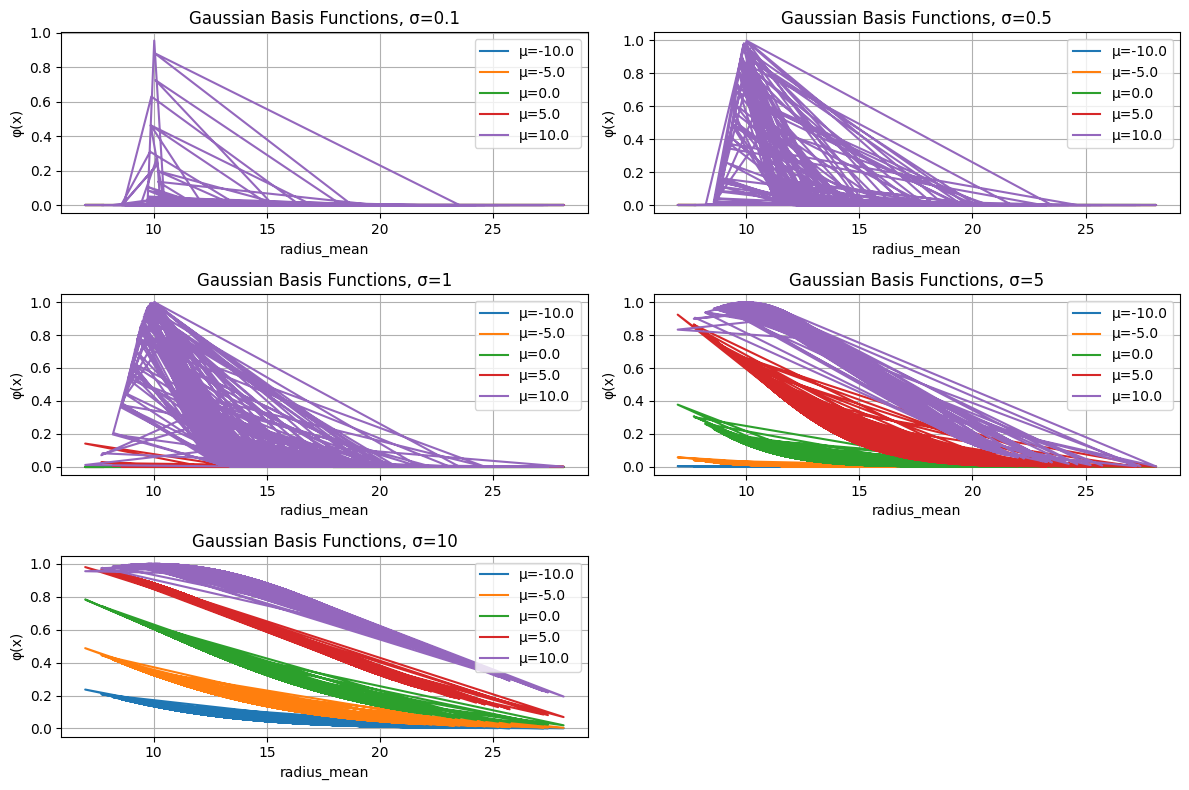

In [ ]:
# σ does NOT change the number of columns. It changes the values inside those columns:
# Small σ → narrow Gaussians → each φ(x) is mostly zero except near μ
# Large σ → wide Gaussians → φ(x) values spread out more, smoother
# So σ changes the content of the 155 features, not their number

import matplotlib.pyplot as plt

feature = X['radius_mean'].values  # shape: (569,)
num_basis = 5
mus = np.linspace(-10, 10, num_basis)  # centers
sigmas = [0.1, 0.5, 1, 5, 10]
plt.figure(figsize=(12, 8))

for sigma in sigmas:
    plt.subplot(3, 2, sigmas.index(sigma)+1)
    for mu in mus:
        phi = np.exp(-(feature - mu)**2 / (2*sigma**2))
        plt.plot(feature, phi, label=f'μ={mu:.1f}')
    plt.title(f'Gaussian Basis Functions, σ={sigma}')
    plt.xlabel('radius_mean')
    plt.ylabel('φ(x)')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()




# **f)**
Using no regularization and doing regression with this new set of basis functions, plot the
training and testing error as a function of σ (when using only basis functions of a given σ). Add
constant lines showing the training and testing error you had obtained in part c. Explain how σ
influences overfitting and the bias-variance trade-off.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

sigma_values = [0.1, 0.5, 1, 5, 10]
num_basis = 5

train_errors = []
test_errors = []

# --- Loop over sigma values ---
for sigma in sigma_values:
    # Transform features using Gaussian basis
    X_train_gauss = gaussian_basis_transform(X_train, num_basis=num_basis, sigma=sigma)
    X_test_gauss = gaussian_basis_transform(X_test, num_basis=num_basis, sigma=sigma)

    # Logistic regression WITHOUT regularization
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(X_train_gauss, y_train)

    # Compute log-loss (cross-entropy)
    y_train_prob = model.predict_proba(X_train_gauss)[:,1]
    y_test_prob = model.predict_proba(X_test_gauss)[:,1]

    train_errors.append(log_loss(y_train, y_train_prob))
    test_errors.append(log_loss(y_test, y_test_prob))

    print(f"σ={sigma} -> Train Loss: {train_errors[-1]:.4f}, Test Loss: {test_errors[-1]:.4f}")

σ=0.1 -> Train Loss: 0.2268, Test Loss: 0.1732
σ=0.5 -> Train Loss: 0.2951, Test Loss: 0.2528
σ=1 -> Train Loss: 0.3401, Test Loss: 0.2984
σ=5 -> Train Loss: 0.1930, Test Loss: 0.1638
σ=10 -> Train Loss: 0.1899, Test Loss: 0.1657


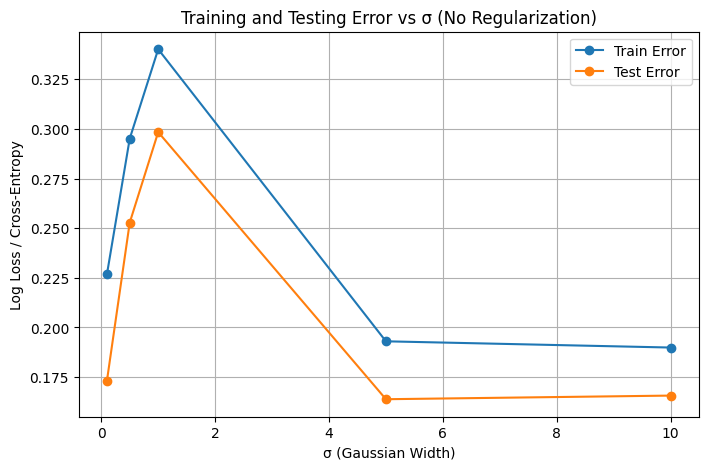

In [ ]:
#Plot
plt.figure(figsize=(8,5))
plt.plot(sigma_values, train_errors, marker='o', label='Train Error')
plt.plot(sigma_values, test_errors, marker='o', label='Test Error')
plt.xlabel('σ (Gaussian Width)')
plt.ylabel('Log Loss / Cross-Entropy')
plt.title('Training and Testing Error vs σ (No Regularization)')
plt.legend()
plt.grid(True)
plt.show()

# **g)**
Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy
error for the training data and the testing data, as a function of λ (you should use a log scale
for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different
graph the L2 norm of the weights for the set of basis functions corresponding to each value
of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [ ]:
# Features and target
X = df.drop(columns=["diagnosis", "Unnamed: 32"], errors='ignore')
y = df["diagnosis"]

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Impute missing values if any
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (398, 31)
Test shape: (171, 31)


At this point, we have all Gaussian basis functions included.

In [ ]:
import numpy as np

sigma_values = [0.1, 0.5, 1, 5, 10]
num_basis = 5  # per feature

# Create a dictionary to store Gaussian-transformed features for each σ
X_train_gauss_dict = {}
X_test_gauss_dict = {}

for sigma in sigma_values:
    X_train_gauss_dict[sigma] = gaussian_basis_transform(X_train, num_basis=num_basis, sigma=sigma)
    X_test_gauss_dict[sigma] = gaussian_basis_transform(X_test, num_basis=num_basis, sigma=sigma)

# Combine all σ-based features horizontally to create a single matrix
X_train_all_gauss = np.hstack([X_train_gauss_dict[sigma] for sigma in sigma_values])
X_test_all_gauss = np.hstack([X_test_gauss_dict[sigma] for sigma in sigma_values])

print("Combined Gaussian features shape (train):", X_train_all_gauss.shape)
print("Combined Gaussian features shape (test):", X_test_all_gauss.shape)


Combined Gaussian features shape (train): (398, 775)
Combined Gaussian features shape (test): (171, 775)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Regularization parameters
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

# Lists to store results
train_losses = []
test_losses = []
weight_norms = []
weight_norms_per_sigma = {sigma: [] for sigma in sigma_values}
train_accuracies = []
test_accuracies = []
all_weights = []

for lam in lambdas:
    # Handle λ=0 as very large C
    C_value = 1e12 if lam == 0 else 1/lam

    # Create and fit model
    model = LogisticRegression(penalty='l2', C=C_value, solver='lbfgs', max_iter=1000)
    model.fit(X_train_all_gauss, y_train)

    # Predict probabilities and classes
    y_train_prob = model.predict_proba(X_train_all_gauss)[:,1]
    y_test_prob = model.predict_proba(X_test_all_gauss)[:,1]
    y_train_pred = model.predict(X_train_all_gauss)
    y_test_pred = model.predict(X_test_all_gauss)

    # Metrics
    train_losses.append(log_loss(y_train, y_train_prob))
    test_losses.append(log_loss(y_test, y_test_prob))
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

    # Store weights and norms
    all_weights.append(model.coef_.flatten())
    weight_norms.append(np.linalg.norm(model.coef_))

    # L2 norm per σ group
    start = 0
    for sigma in sigma_values:
        end = start + X_train_gauss_dict[sigma].shape[1]
        w_sigma = model.coef_.flatten()[start:end]
        weight_norms_per_sigma[sigma].append(np.linalg.norm(w_sigma))
        start = end

print("Done training for all λ values")


Done training for all λ values


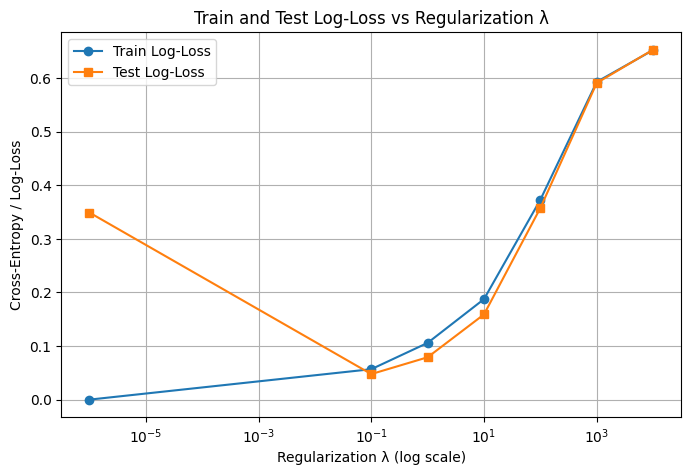

In [ ]:
# Avoid log(0) issue for λ=0
lambda_vals_plot = np.array(lambdas) + 1e-6

# 1)Plot Train/Test Log-Loss vs λ
plt.figure(figsize=(8,5))
plt.plot(lambda_vals_plot, train_losses, marker='o', label='Train Log-Loss')
plt.plot(lambda_vals_plot, test_losses, marker='s', label='Test Log-Loss')
plt.xscale('log')
plt.xlabel('Regularization λ (log scale)')
plt.ylabel('Cross-Entropy / Log-Loss')
plt.title('Train and Test Log-Loss vs Regularization λ')
plt.legend()
plt.grid(True)
plt.show()

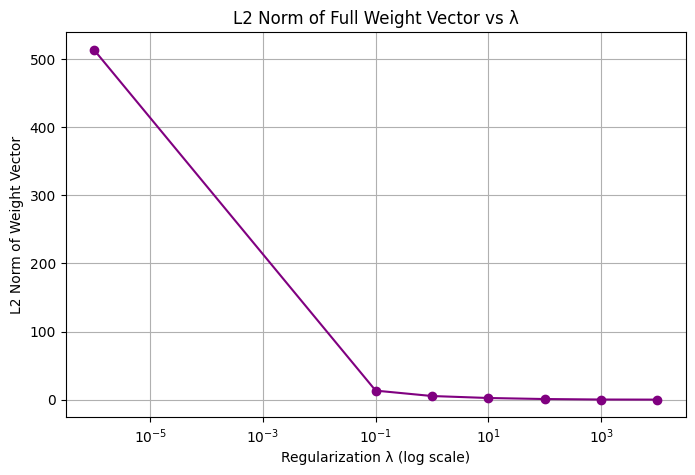

In [ ]:
#2) Plot L2 Norm of full weight vector vs λ
plt.figure(figsize=(8,5))
plt.plot(lambda_vals_plot, weight_norms, marker='o', color='purple')
plt.xscale('log')
plt.xlabel('Regularization λ (log scale)')
plt.ylabel('L2 Norm of Weight Vector')
plt.title('L2 Norm of Full Weight Vector vs λ')
plt.grid(True)
plt.show()

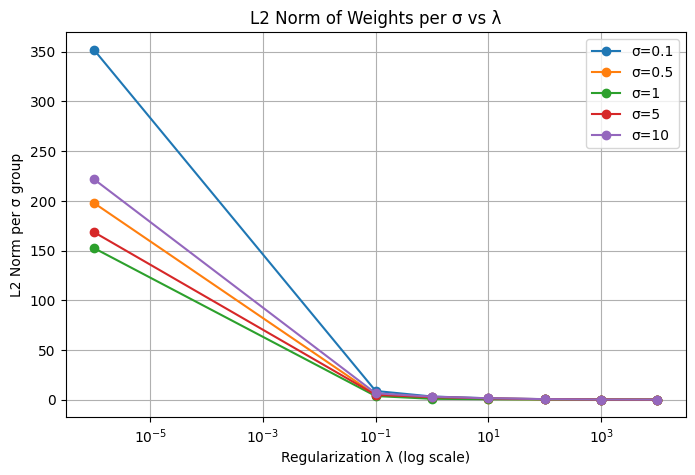

In [ ]:
# 3) Plot L2 Norm of weights for each σ group vs λ
plt.figure(figsize=(8,5))
for sigma in sigma_values:
    plt.plot(lambda_vals_plot, weight_norms_per_sigma[sigma], marker='o', label=f'σ={sigma}')
plt.xscale('log')
plt.xlabel('Regularization λ (log scale)')
plt.ylabel('L2 Norm per σ group')
plt.title('L2 Norm of Weights per σ vs λ')
plt.legend()
plt.grid(True)
plt.show()

# **h)**
Explain what you would need to do if you wanted to design a set of Gaussian basis functions
that capture relationships between the inputs. Explain the impact of this choice onthe bias-variance trade-off. No experiments are needed (although you are welcome to explore
this on your own).

In [ ]:
# ANS

Designing Gaussian Basis Functions to Capture Relationships Between Inputs

So far, we have used Gaussian basis functions for each input feature separately. This captures nonlinear effects of individual features but does not model interactions between features.

To capture relationships between inputs, you can:

Use multivariate Gaussian basis functions that take multiple features together. This allows the basis functions to encode how features interact.

Include combinations of features (like products of two or more features) and then apply Gaussian basis functions on these new features.

Learn the placement of basis functions from data instead of using evenly spaced ones, so they focus on important regions of the input space.

Impact on bias-variance trade-off:

Capturing relationships reduces bias, because the model can represent more complex patterns.

Variance increases, because the model now has more parameters and can overfit the data.

Stronger regularization may be needed to control overfitting.

# **i)**
Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would
like to adapt the placement of these functions. Derive a learning algorithm that computes
both the placement of the basis function, μi and the weight vector w from data (assuming
that the width σ isfixed. You should still allow for L2 regularization of the weight vector.
Note that your algorithm will need to be iterative.

What this code does:

Initializes a set of Gaussian basis function centers (μ) randomly.

Iteratively:

Transforms the input data with Gaussian basis functions.

Fits logistic regression (with L2 regularization) to update w.

Updates μ using gradient descent on the training loss.

Stops after max_iter iterations and prints train/test log-loss.

In [ ]:
# Convert target to numeric: M=1, B=0
y = df["diagnosis"].map({"M": 1, "B": 0})

# Then do the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Convert to numpy array
y_train_arr = y_train.values
y_test_arr = y_test.values


# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit on train
X_test_scaled = scaler.transform(X_test)        # transform test

# --- Parameters ---
n_basis = 5      # number of Gaussian basis functions
sigma = 1.0      # fixed width
lr_mu = 0.01     # learning rate for mu updates
max_iter = 10    # max iterations
C = 1.0          # L2 regularization

n_features = X_train_scaled.shape[1]
y_train_arr = y_train.values  # convert to numpy array

# --- Initialize μ randomly within feature ranges ---
mu = np.random.uniform(X_train_scaled.min(axis=0), X_train_scaled.max(axis=0), size=(n_basis, n_features))

# --- Gaussian transformation ---
def gaussian_transform(X, mu, sigma):
    n_samples = X.shape[0]
    n_basis = mu.shape[0]
    X_transformed = np.zeros((n_samples, n_basis))
    for i in range(n_basis):
        diff = X - mu[i]  # shape (n_samples, n_features)
        X_transformed[:, i] = np.exp(-np.sum(diff**2, axis=1) / (2 * sigma**2))
    return X_transformed

# --- Iterative training ---
for iteration in range(max_iter):
    # 1. Transform features
    X_train_phi = gaussian_transform(X_train_scaled, mu, sigma)

    # 2. Fit logistic regression
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    model.fit(X_train_phi, y_train_arr)

    # 3. Predictions and log-loss
    y_train_prob = model.predict_proba(X_train_phi)[:,1]
    loss = log_loss(y_train_arr, y_train_prob)
    print(f"Iteration {iteration+1}, Train Log-Loss: {loss:.4f}")

    # 4. Update μ
    for i in range(n_basis):
        diff = X_train_scaled - mu[i]  # (n_samples, n_features)
        grad_mu = np.sum(((y_train_prob - y_train_arr)[:, np.newaxis]) * (diff / sigma**2) * X_train_phi[:, i][:, np.newaxis], axis=0)
        mu[i] -= lr_mu * grad_mu

# --- Final evaluation ---
X_test_phi = gaussian_transform(X_test_scaled, mu, sigma)
y_test_prob = model.predict_proba(X_test_phi)[:,1]
test_loss = log_loss(y_test.values, y_test_prob)
print(f"Final Test Log-Loss: {test_loss:.4f}")

Iteration 1, Train Log-Loss: 0.6599
Iteration 2, Train Log-Loss: 0.6599
Iteration 3, Train Log-Loss: 0.6599
Iteration 4, Train Log-Loss: 0.6599
Iteration 5, Train Log-Loss: 0.6599
Iteration 6, Train Log-Loss: 0.6599
Iteration 7, Train Log-Loss: 0.6599
Iteration 8, Train Log-Loss: 0.6599
Iteration 9, Train Log-Loss: 0.6599
Iteration 10, Train Log-Loss: 0.6599
Final Test Log-Loss: 0.6612


# **(j)**
Does your algorithm converge? If so, does it obtain a locally or globally optimal solution?
Explain your answer.

In [ ]:
# ANS

Convergence:

Your algorithm may converge, meaning the log-loss stabilizes after several iterations.

However, convergence depends on factors like the learning rate, number of basis functions, initial μ values, and data complexity.

Optimality:

The solution obtained is generally locally optimal, not globally optimal.

Reason:

Logistic regression with fixed features is convex, so weights w alone would reach a global optimum.

But when you also update the basis function centers μ, the problem becomes non-convex.

Non-convex problems can have multiple local minima, so the final solution depends on the initialization of μ and the path of gradient updates.

Summary:

Yes, it can converge, but only to a local optimum for μ and w.

Different random initializations of μ can lead to different final solutions.